In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [2]:
csv_path = os.path.join('../data/raw', 'ipeadata[05-06-2025-04-16].csv' )

In [3]:
from src.data_handler import Data_handler

In [4]:
dh = Data_handler(csv_path)

In [10]:
df = dh.load_csv(skiprows=1)

In [11]:
df = dh.clean_data()
for i in range(2012, 2023):
    df[str(i)] = df[str(i)].str.replace(",", ".").astype(float)


In [12]:
print(df.shape)
print(df.head())

(27, 15)
  Sigla  CÃ³digo    Estado   2012   2013   2014   2015   2016   2017   2018  \
0    AC       12      Acre  0.566  0.553  0.529  0.549  0.563  0.545  0.558   
1    AL       27   Alagoas  0.503  0.510  0.527  0.525  0.523  0.525  0.550   
2    AM       13  Amazonas  0.589  0.581  0.562  0.553  0.558  0.591  0.544   
3    AP       16    AmapÃ¡  0.528  0.513  0.523  0.548  0.555  0.589  0.547   
4    BA       29     Bahia  0.563  0.535  0.528  0.522  0.539  0.590  0.550   

    2019   2020   2021   2022  Unnamed: 14  
0  0.559  0.515  0.539  0.523          NaN  
1  0.527  0.510  0.526  0.498          NaN  
2  0.566  0.533  0.541  0.509          NaN  
3  0.513  0.500  0.530  0.531          NaN  
4  0.557  0.537  0.546  0.511          NaN  


In [13]:
df_long = dh.gini_df_to_long(df=df)
df_long['Ano'] = df_long['Ano'].astype(int)

In [15]:
print(df_long)

    Sigla  CÃ³digo             Estado   Ano   Gini
0      AC       12               Acre  2012  0.566
1      AL       27            Alagoas  2012  0.503
2      AM       13           Amazonas  2012  0.589
3      AP       16             AmapÃ¡  2012  0.528
4      BA       29              Bahia  2012  0.563
..    ...      ...                ...   ...    ...
292    RS       43  Rio Grande do Sul  2022  0.467
293    SC       42     Santa Catarina  2022  0.419
294    SE       28            Sergipe  2022  0.528
295    SP       35         SÃ£o Paulo  2022  0.500
296    TO       17          Tocantins  2022  0.507

[297 rows x 5 columns]


In [17]:
from src.PlotGenerator import PlotGenerator

In [22]:
plt = PlotGenerator(df_long=df_long)

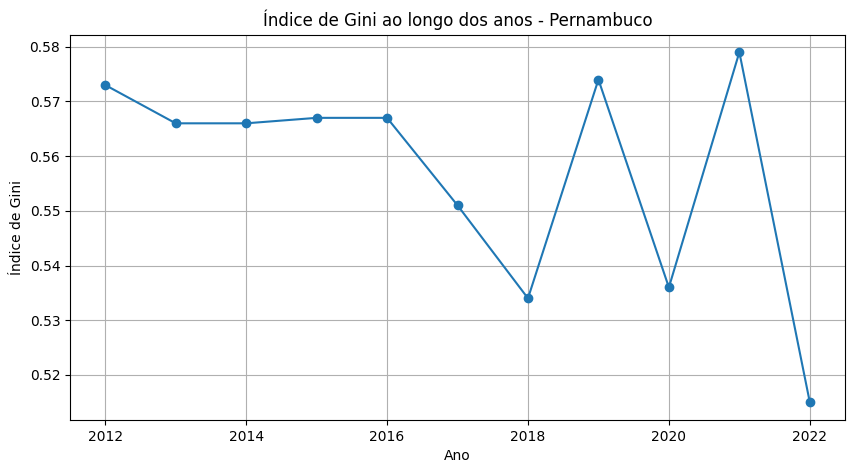

In [23]:
plt.plot_gini_over_time_by_state('Pernambuco')